### Постановка цели
##### **Задача:** прогнозирование стоимости аренды жилья  
##### **Цель:** создать модель ML для предсказания стоимости жилья на основе параметров жилья и других факторов.

###  Исследовательский анализ данных (EDA) и предобработка

##### Загрузка и первичный осмотр.

In [1]:

import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Airbnb_Open_Data.csv',low_memory=False)
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
data.select_dtypes(include=['object', 'category']).nunique()

NAME                      61281
host_identity_verified        2
host name                 13190
neighbourhood group           7
neighbourhood               224
country                       1
country code                  1
instant_bookable              2
cancellation_policy           3
room type                     4
price                      1151
service fee                 231
last review                2477
house_rules                1976
license                       1
dtype: int64

<Axes: >

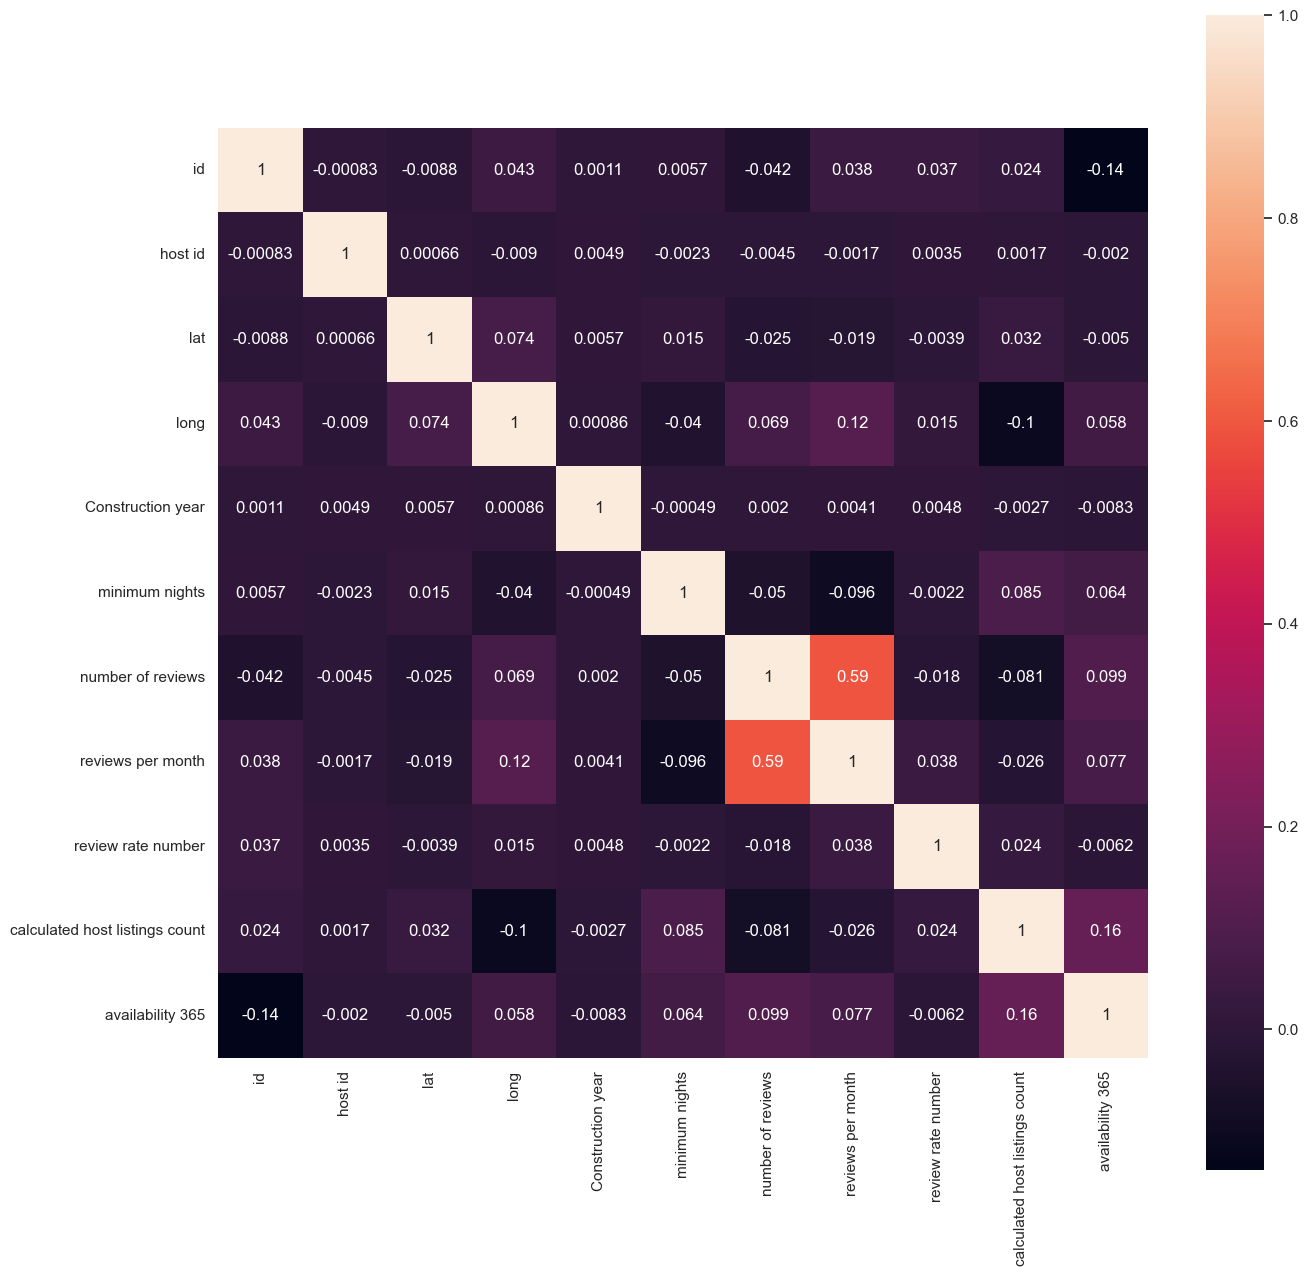

In [5]:
numeric_data = data.select_dtypes(include=[np.number]).copy()
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(numeric_data.corr(), annot=True, square=True)


In [6]:

for col in data.columns:
    if data[col].value_counts().shape[0] == 1:
        data = data.drop(col, axis=1)
data.drop(columns = ['NAME', 'host id', 'id'], axis=1, inplace=True)
data.head()

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [7]:
data.describe()

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


##### Обработка пропусков, дубликатов, аномалий.

In [8]:
data.duplicated().any()


np.True_

In [9]:
data.shape

(102599, 20)

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(99154, 20)

In [11]:
data.isna().sum()

host_identity_verified              289
host name                           392
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      398
number of reviews                   180
last review                       15384
reviews per month                 15370
review rate number                  315
calculated host listings count      308
availability 365                    448
house_rules                       50791
dtype: int64

In [12]:
import missingno as msno

<Axes: >

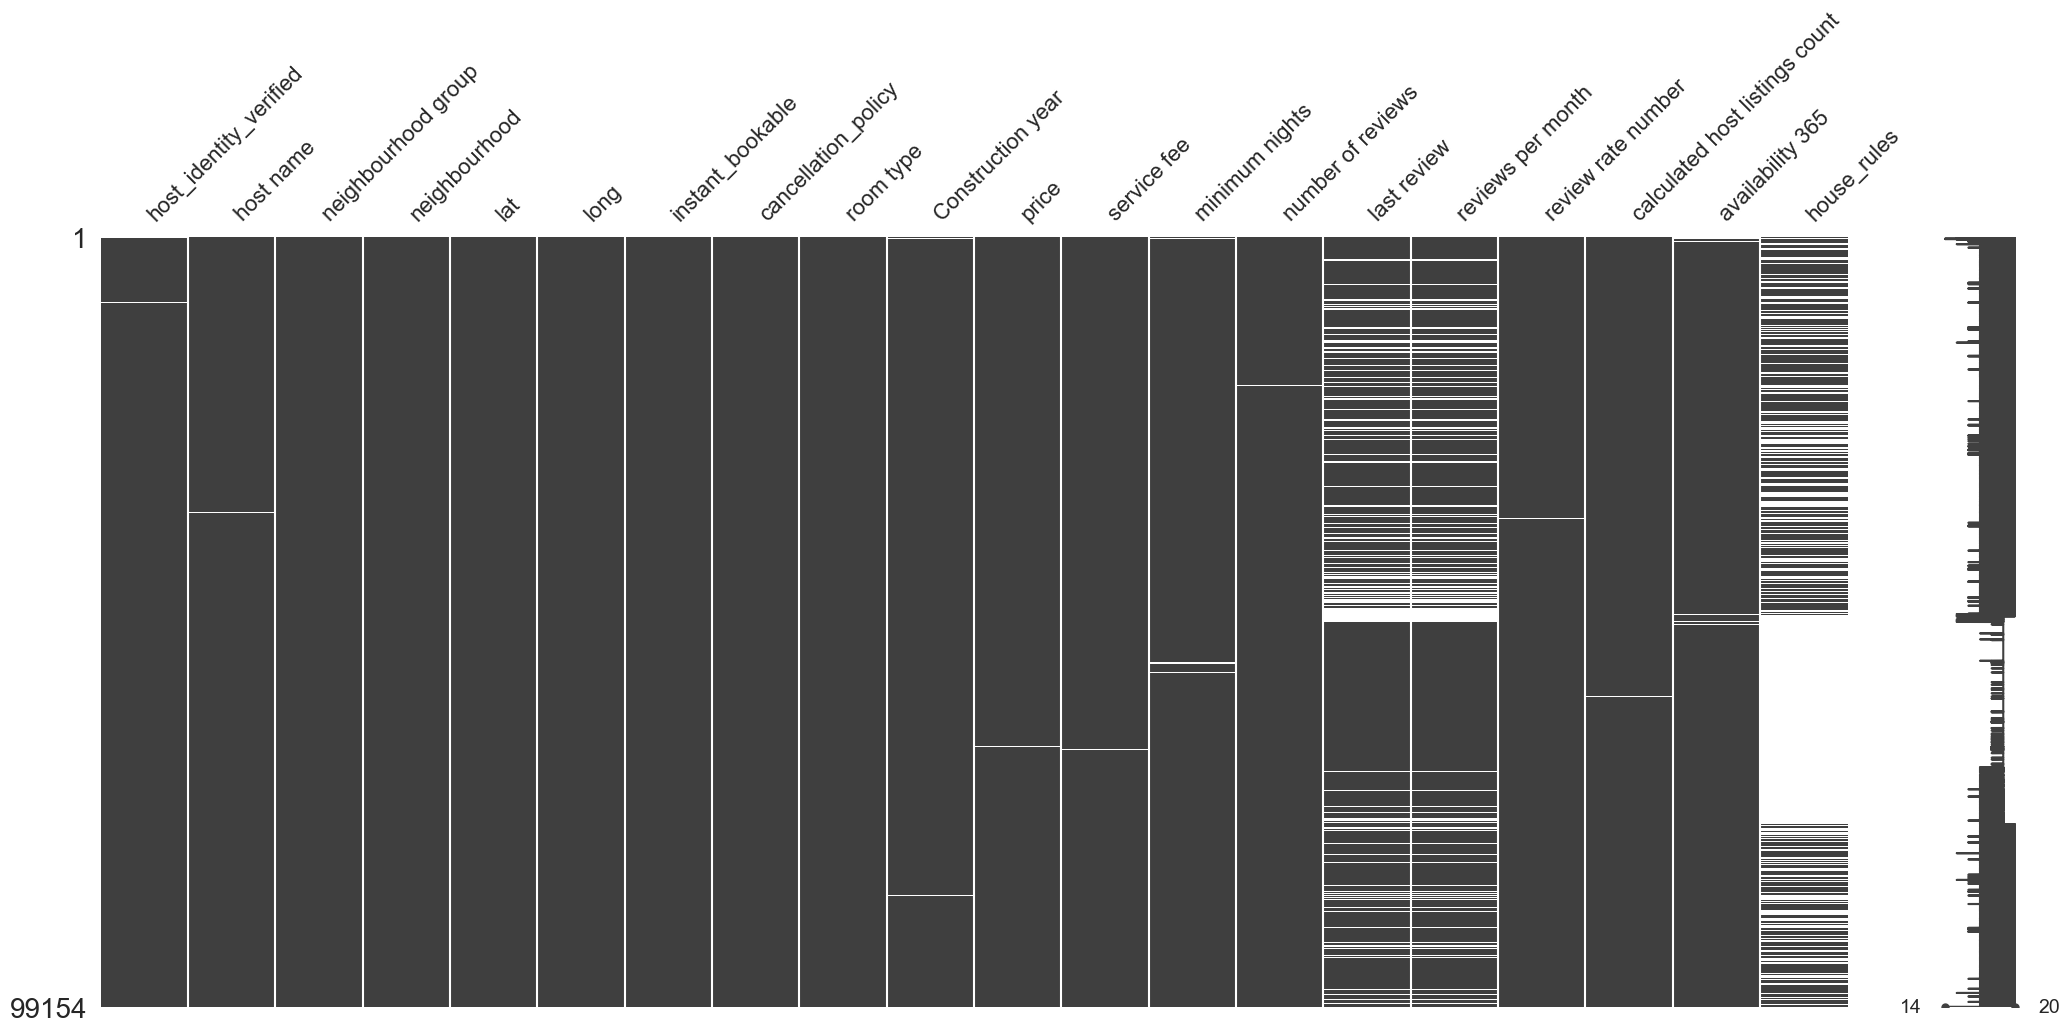

In [13]:
msno.matrix(data)

In [14]:
data = data.drop(data.columns[data.isnull().mean() > 0.4], axis=1)
data.head()

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


#### Обработка данных

обработка лишних знаков

In [15]:
def clean_trash(data, columns_config):

    for col_name, operations in columns_config.items():
        if col_name not in data.columns:
            continue
            
        for operation in operations:
            if operation == 'remove_symbols':
                data[col_name] = data[col_name].astype(str).str.replace(r'[\$,]', '', regex=True)
            elif operation == 'strip':
                data[col_name] = data[col_name].astype(str).str.strip()
            elif operation == 'to_float':
                data[col_name] = pd.to_numeric(data[col_name], errors='coerce')
            elif operation == 'to_int':
                data[col_name] = pd.to_numeric(data[col_name], errors='coerce').astype('Int64')
    
    return data



In [16]:
data = clean_trash(data, {
    'price': ['remove_symbols', 'strip', 'to_float'],
    'host name': ['remove_symbols', 'strip'],
    'neighbourhood': ['remove_symbols', 'strip'],
    'service fee': ['remove_symbols', 'strip', 'to_float'],
    'number of reviews':['remove_symbols', 'strip', 'to_float'],
    'review rate numbe':['remove_symbols', 'strip', 'to_int']

})

##### обработка даты

In [17]:
data['last review'] = pd.to_datetime(data['last review'])

In [18]:
# fills null date 
num_days = 10
g = data['last review'].notna().cumsum()
days = pd.to_timedelta(data.groupby(g).cumcount().mul(num_days), unit='d')
data['last review'] = data['last review'].ffill().add(days)

##### обработка имен. создаем колонку полов

In [19]:
#pip install gender-guesser

In [20]:
import gender_guesser.detector as gender
d = gender.Detector()

def get_gender_from_name(name):
    if pd.isna(name):
        return 'unknown'
    first_name = str(name).split()[0].title()
    return d.get_gender(first_name)

data['gender'] = data['host name'].apply(get_gender_from_name)


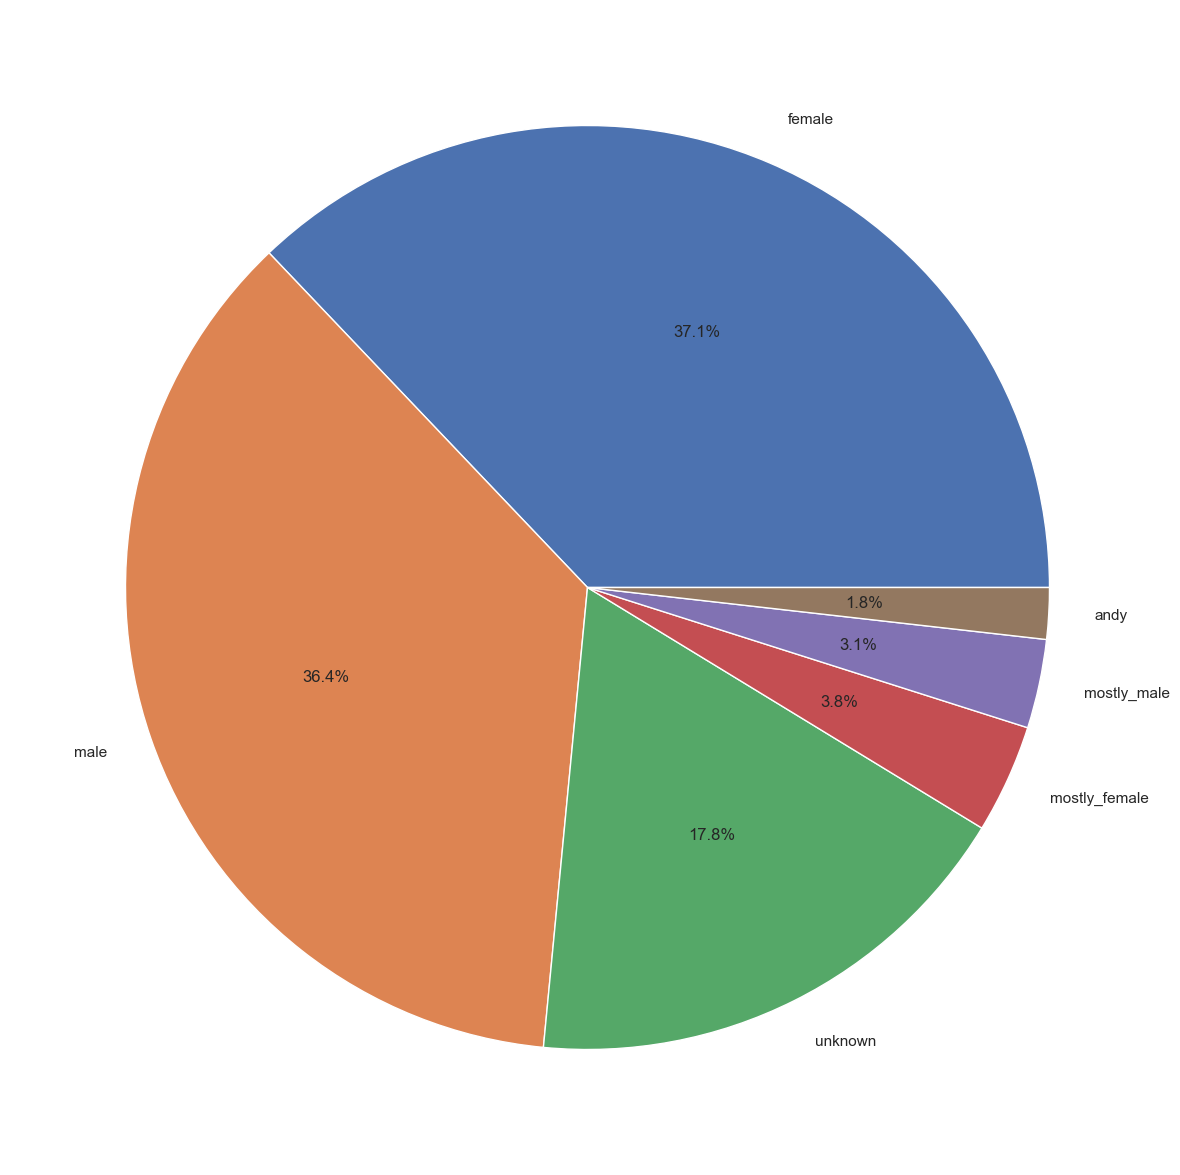

In [21]:
x = data['gender'].value_counts()
plt.pie(x, data=data['gender'], labels=x.index, autopct='%1.1f%%')
plt.show()

##### Чистим availability 365 и minimum nights

In [22]:
data['availability 365'].describe()

count    98706.000000
mean       142.035955
std        135.466480
min        -10.000000
25%          4.000000
50%         99.000000
75%        270.000000
max       3677.000000
Name: availability 365, dtype: float64

In [23]:
data['availability 365'] = np.where(data['availability 365']<0, data['availability 365']*-1, data['availability 365'])
data['availability 365'] = np.where(data['availability 365']>365, 365, data['availability 365'])

In [24]:
data['minimum nights'].describe()

count    98756.000000
mean         8.166491
std         30.932012
min      -1223.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       5645.000000
Name: minimum nights, dtype: float64

In [25]:
data['minimum nights'] = np.where(data['minimum nights']<0, data['minimum nights']*-1, data['minimum nights'])

#### Обработка пропусков

<Axes: >

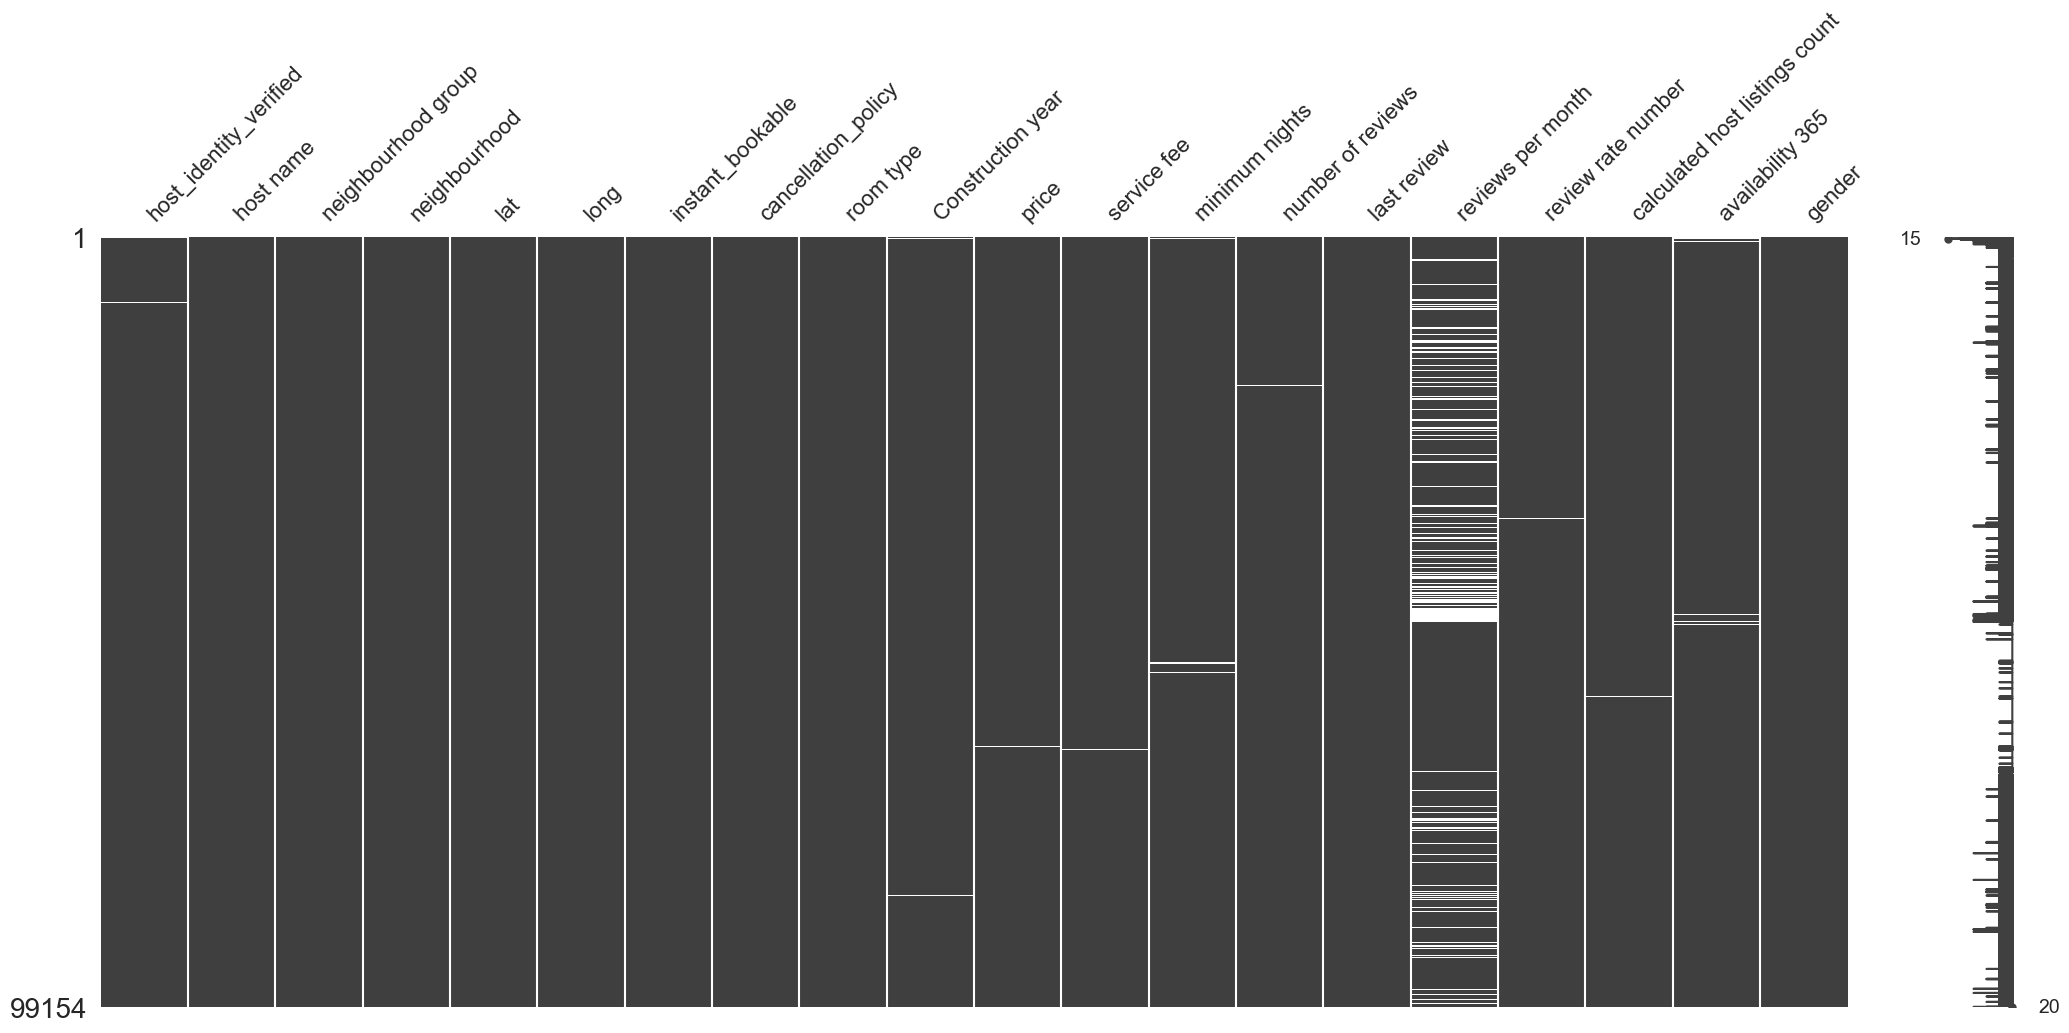

In [26]:
msno.matrix(data)

##### заполняем пропуски нулями в ценах

In [27]:
data['service fee'] = data['service fee'].fillna(0)

##### заполняем пропуски

In [28]:
def fill_na_data(data, columns_config):
    
    for col_name, operations in columns_config.items():
        if col_name not in data.columns:
            continue

        for operation in operations:
            if operation == 'mean':
                data[col_name] = data[col_name].fillna(data[col_name].mean())
            elif operation == 'median':
                data[col_name] = data[col_name].fillna(data[col_name].median())
            # elif operation == 'mode':
            #     data[col_name] = data[col_name].fillna(data[col_name].mode())

    return data


data = fill_na_data(data, {
    'minimum nights': ['median'],
    'number of reviews': ['median'],
    'reviews per month': ['median'],
    'review rate number': ['median'],
    'calculated host listings coun': ['median'], 
    'availability 365': ['median'],
})

In [29]:
data['Construction year'] = data.groupby('neighbourhood')['Construction year']\
    .transform(lambda x: x.fillna(x.median()))

<Axes: >

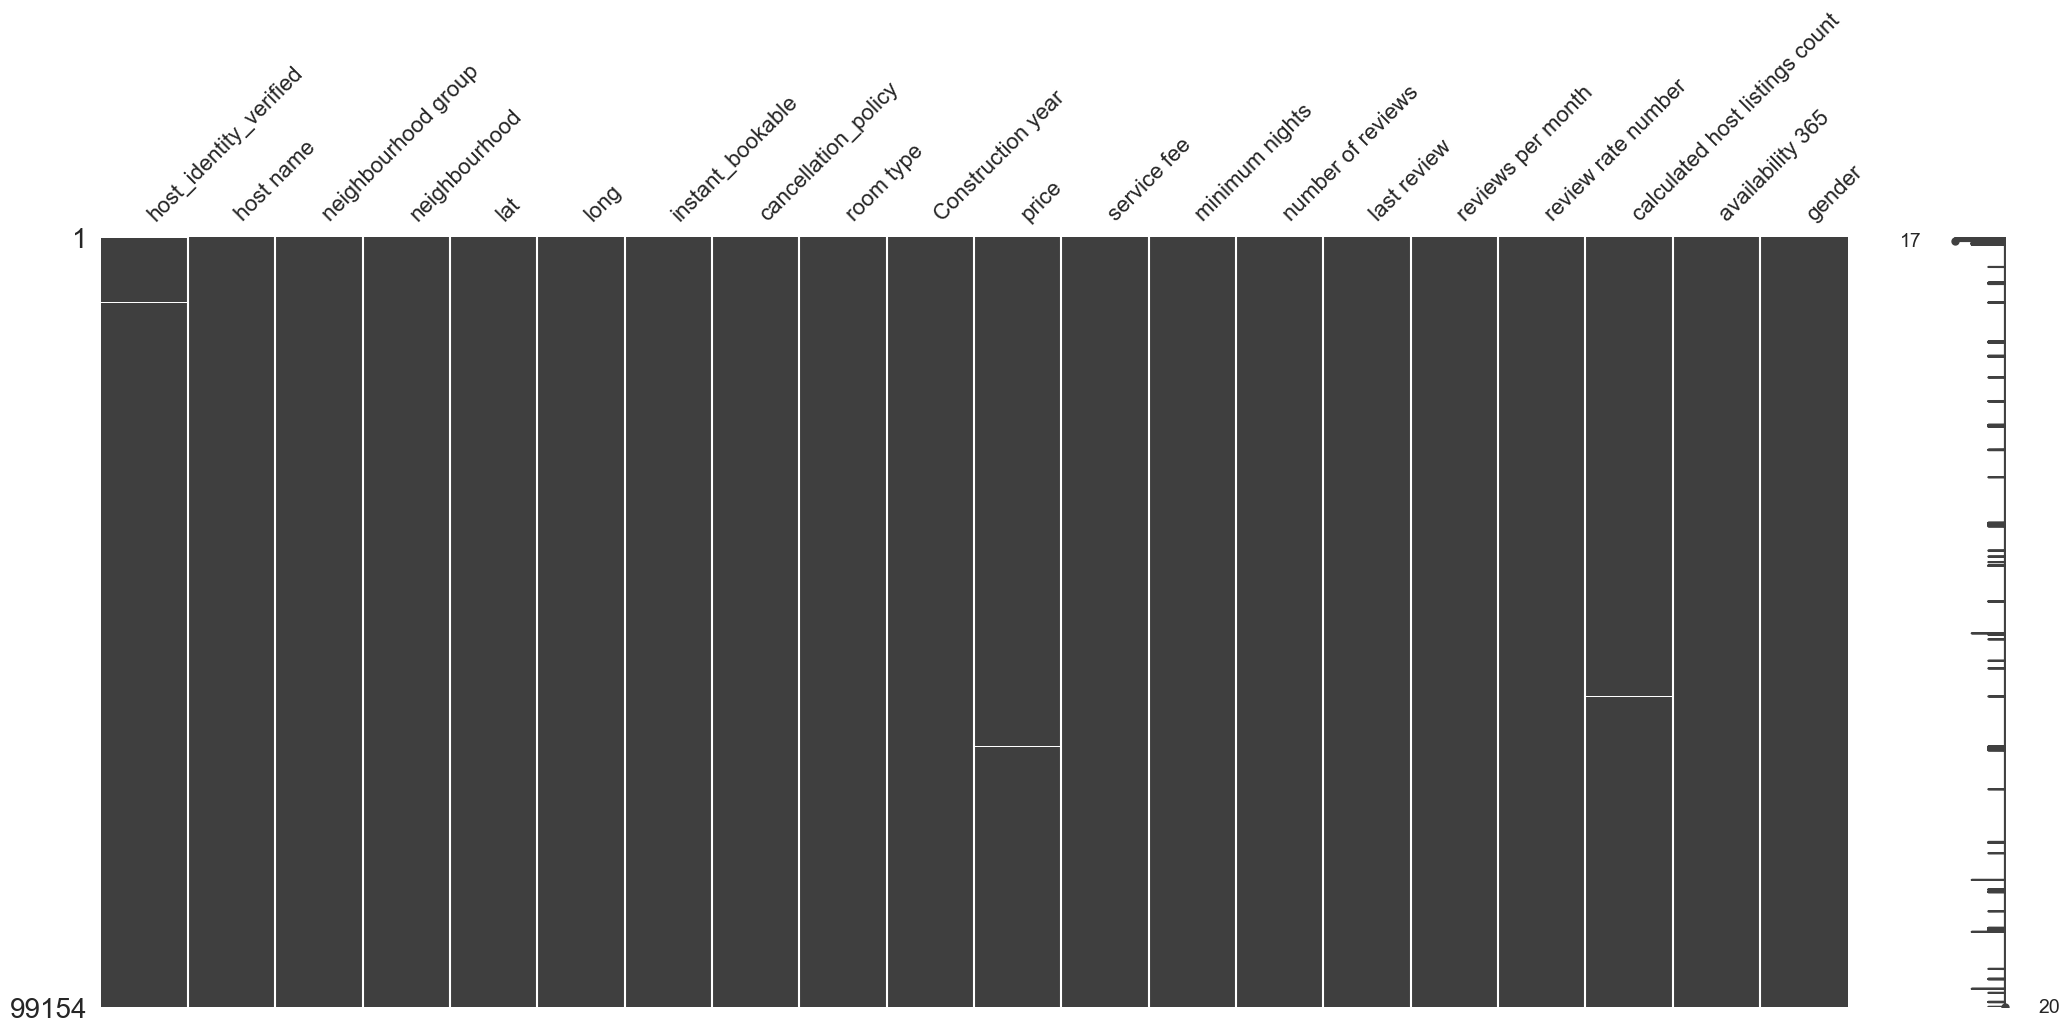

In [30]:
msno.matrix(data)

##### Удаляем строки в колонках с маленьким числом пропусков

In [31]:
data = data.dropna()


In [32]:
data.isna().sum().sort_values()

host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
gender                            0
dtype: int64

### EDA

#### host identity varified

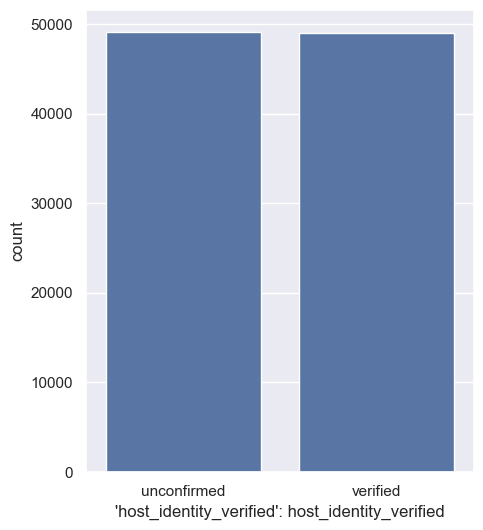

In [33]:
feature = 'host_identity_verified'
plt.figure(figsize=(5,6))
plt.xlabel("'host_identity_verified': {}".format('host_identity_verified'))
sns.countplot(data=data, x='host_identity_verified')
plt.show()

####  lat & long

In [34]:
lat_mean = data['lat'].mean()
long_mean = data['long'].mean()
area_lat = data['lat'].groupby(data['neighbourhood group']).mean()
area_long = data['long'].groupby(data['neighbourhood group']).mean()
area_lat_long= pd.concat([area_lat,area_long],axis=1)
area_lat_long = area_lat_long.values.tolist()

In [35]:
#pip install folium

In [36]:
import folium
map = folium.Map(
                  # Center the map here
                  location=[lat_mean,long_mean],
                  zoom_start = 10
                )  
for point in range(0, len(area_lat_long)):
  _=folium.Marker(
                      area_lat_long[point],
                      popup = area_lat_long[point]
                      ).add_to(map)
map

In [37]:
from sklearn.metrics.pairwise import haversine_distances

# 1. Центр города
center = np.radians([[data['lat'].mean(), data['long'].mean()]])
# Получаем: [[радианы(lat_центра), радианы(lon_центра)]]
# Двойные скобки [[ ]] нужны для создания 2D массива (1x2)

# 2. Все координаты
coords = np.radians(data[['lat', 'long']])
# Получаем 2D массив размером (n_строк x 2)
# Каждая строка: [радианы(lat_i), радианы(lon_i)]

# 3. Считаем расстояние
data['dist_to_center_km'] = haversine_distances(coords, center) * 6371
# haversine_distances возвращает расстояние в радианах
# Умножаем на радиус Земли (6371 км) → получаем км
#data = data.drop(['lat_center_x', 'lat_center_y', 'long_center_y', 'long_center_x'], axis=1)

<Axes: >

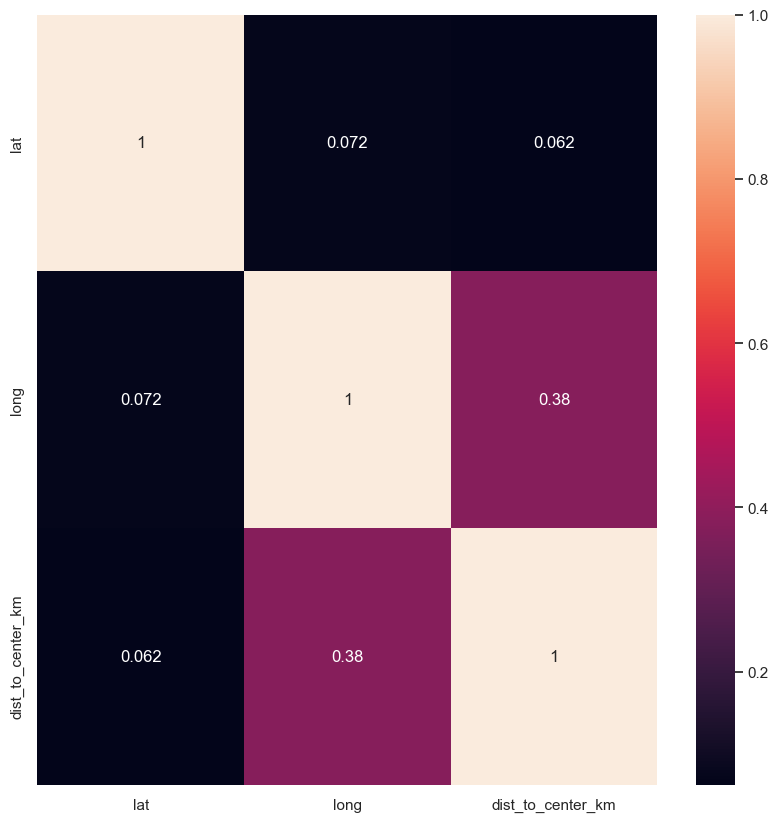

In [38]:
plt.figure(figsize=(10,10))
corr_matrix = data[['lat', 'long', 'dist_to_center_km']].corr()
sns.heatmap(corr_matrix, annot=True)

#### host name

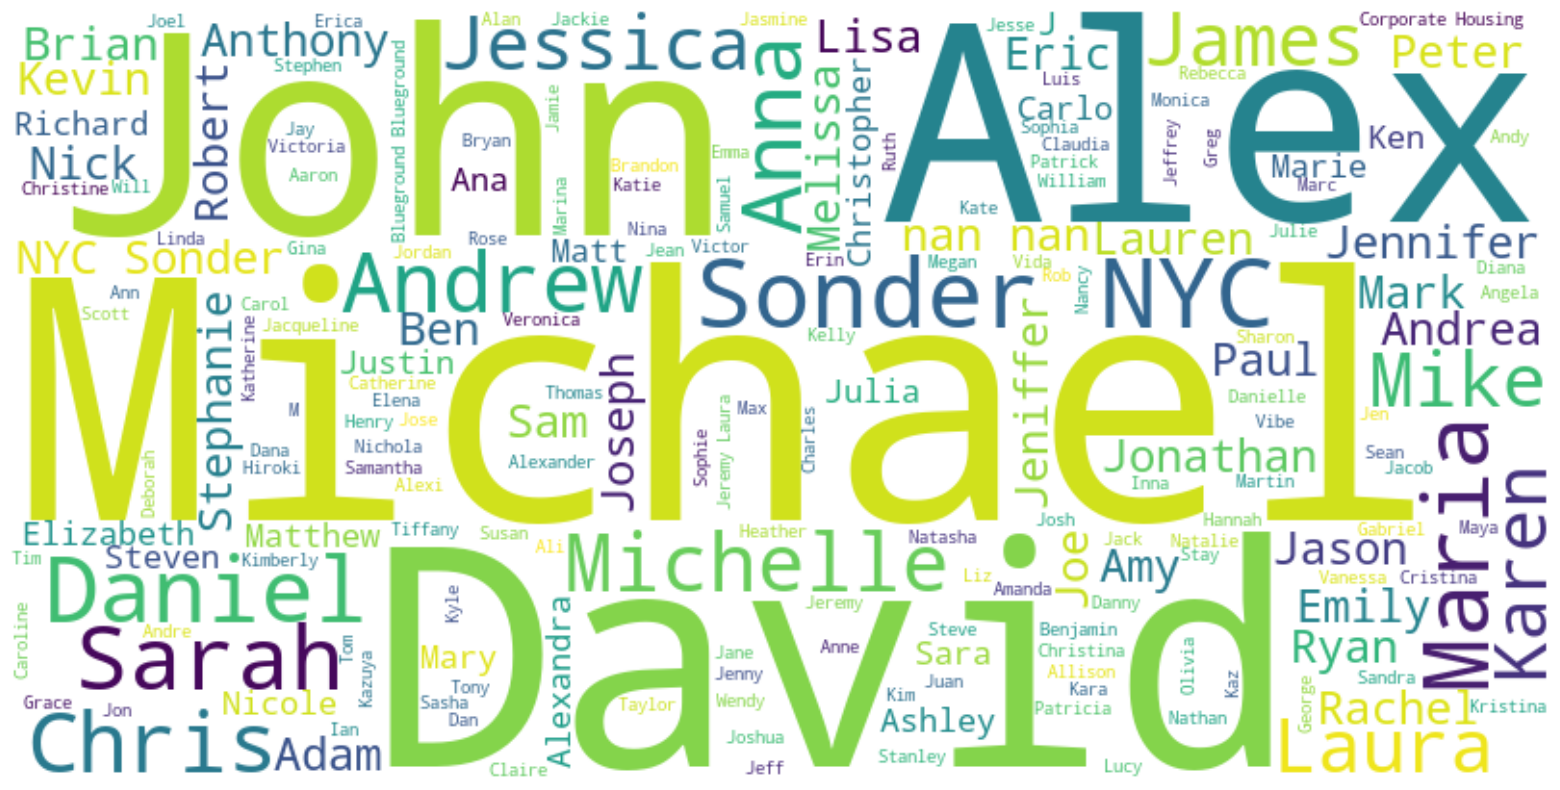

In [39]:
from wordcloud import WordCloud
host_names = data['host name'].values
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(host_names))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### neighbourhood group

C:\Users\user\AppData\Local\Temp\ipykernel_12300\2601120549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_neighborhood.index,
C:\Users\user\AppData\Local\Temp\ipykernel_12300\2601120549.py:6: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=avg_price_by_neighborhood.index,


<Axes: xlabel='neighbourhood group'>

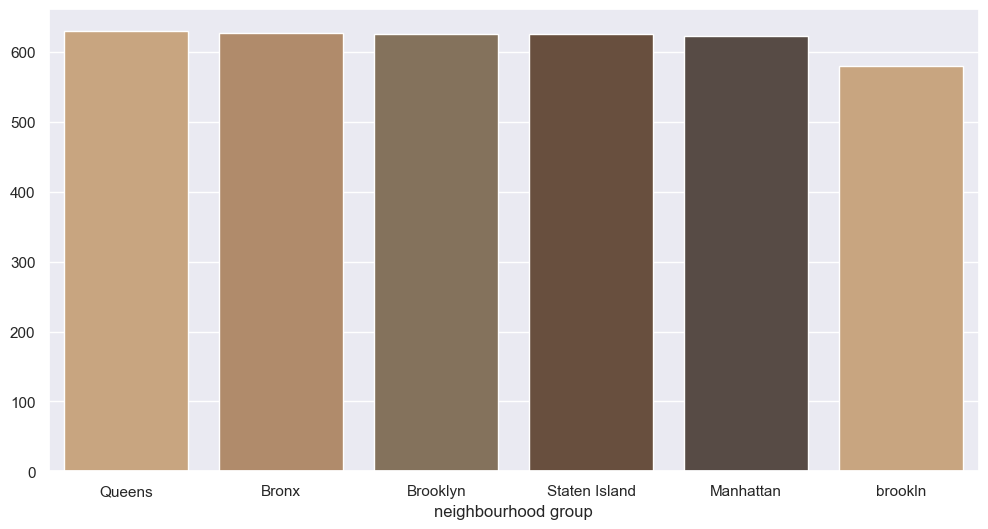

In [40]:
plt.figure(figsize=(12, 6))

# Средняя цена по районам
avg_price_by_neighborhood = data.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price_by_neighborhood.index, 
            y=avg_price_by_neighborhood.values,
            palette=['#D4A574', '#BC8A5F', '#8B7355', '#6F4E37', '#5A4A42'])

#### neighbourhood

большая проблема с neighbourhood в том, что это большие категориальные данные. попробуем трансформировать

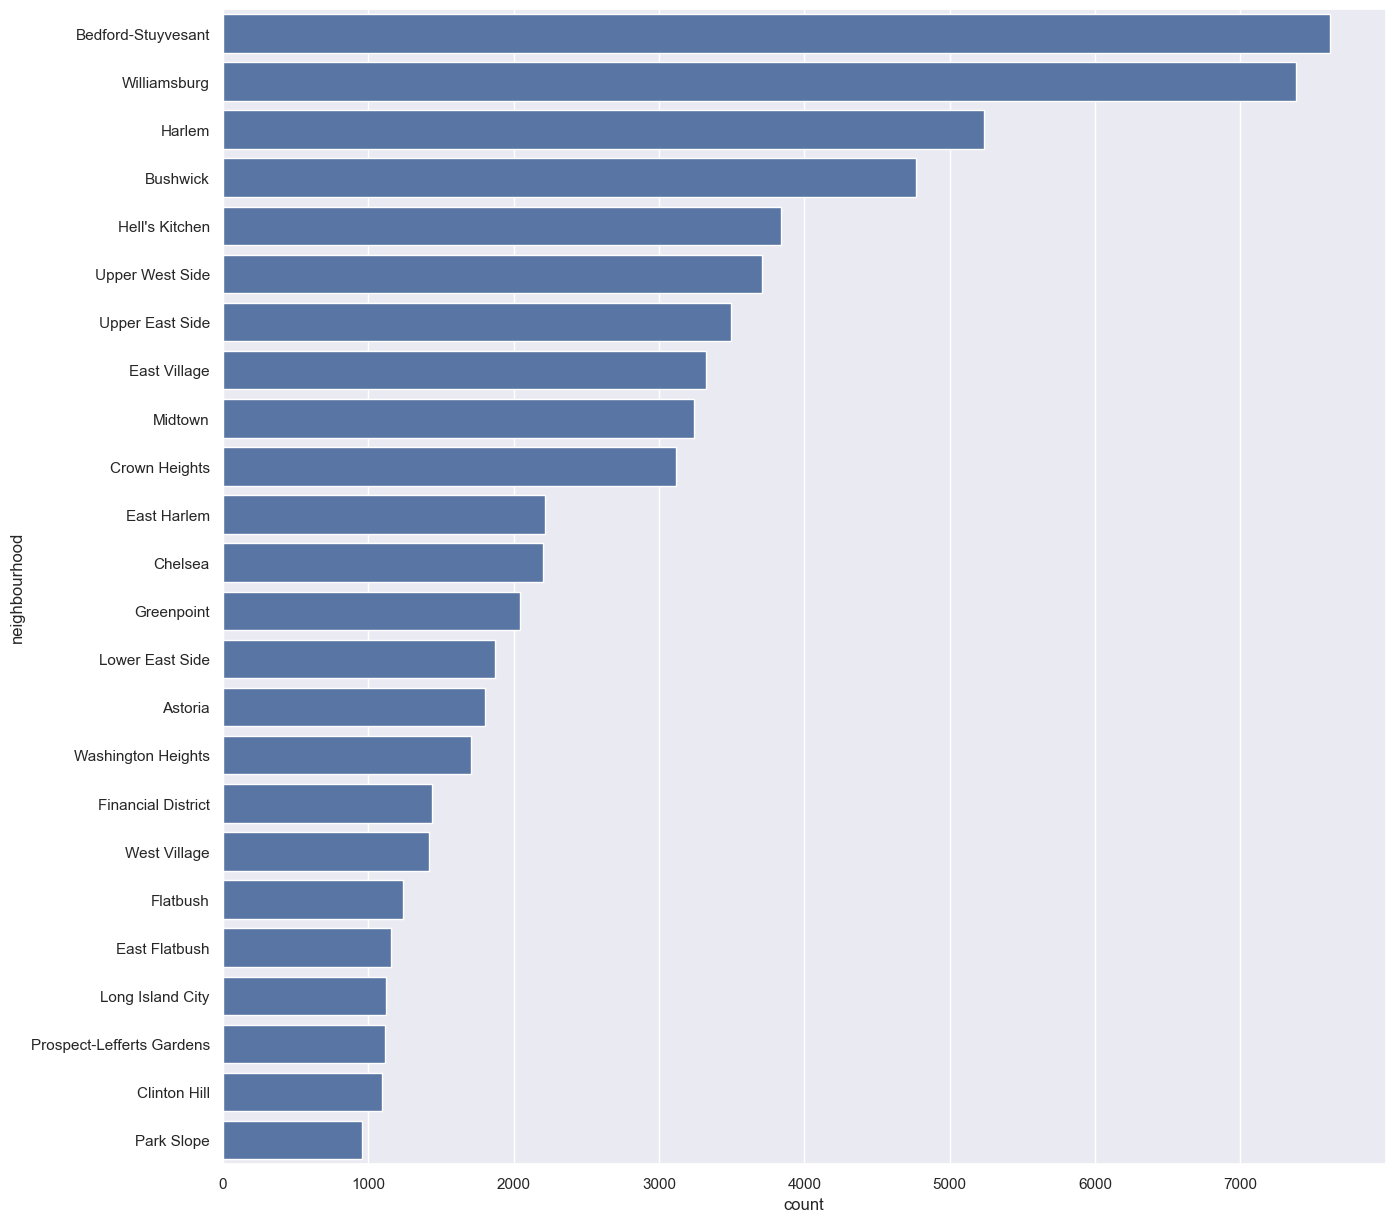

In [41]:

sns.barplot(x=data['neighbourhood'].value_counts()[0:24], 
            y=data['neighbourhood'].value_counts().index[0:24])
plt.show()

In [42]:
#### Construction year

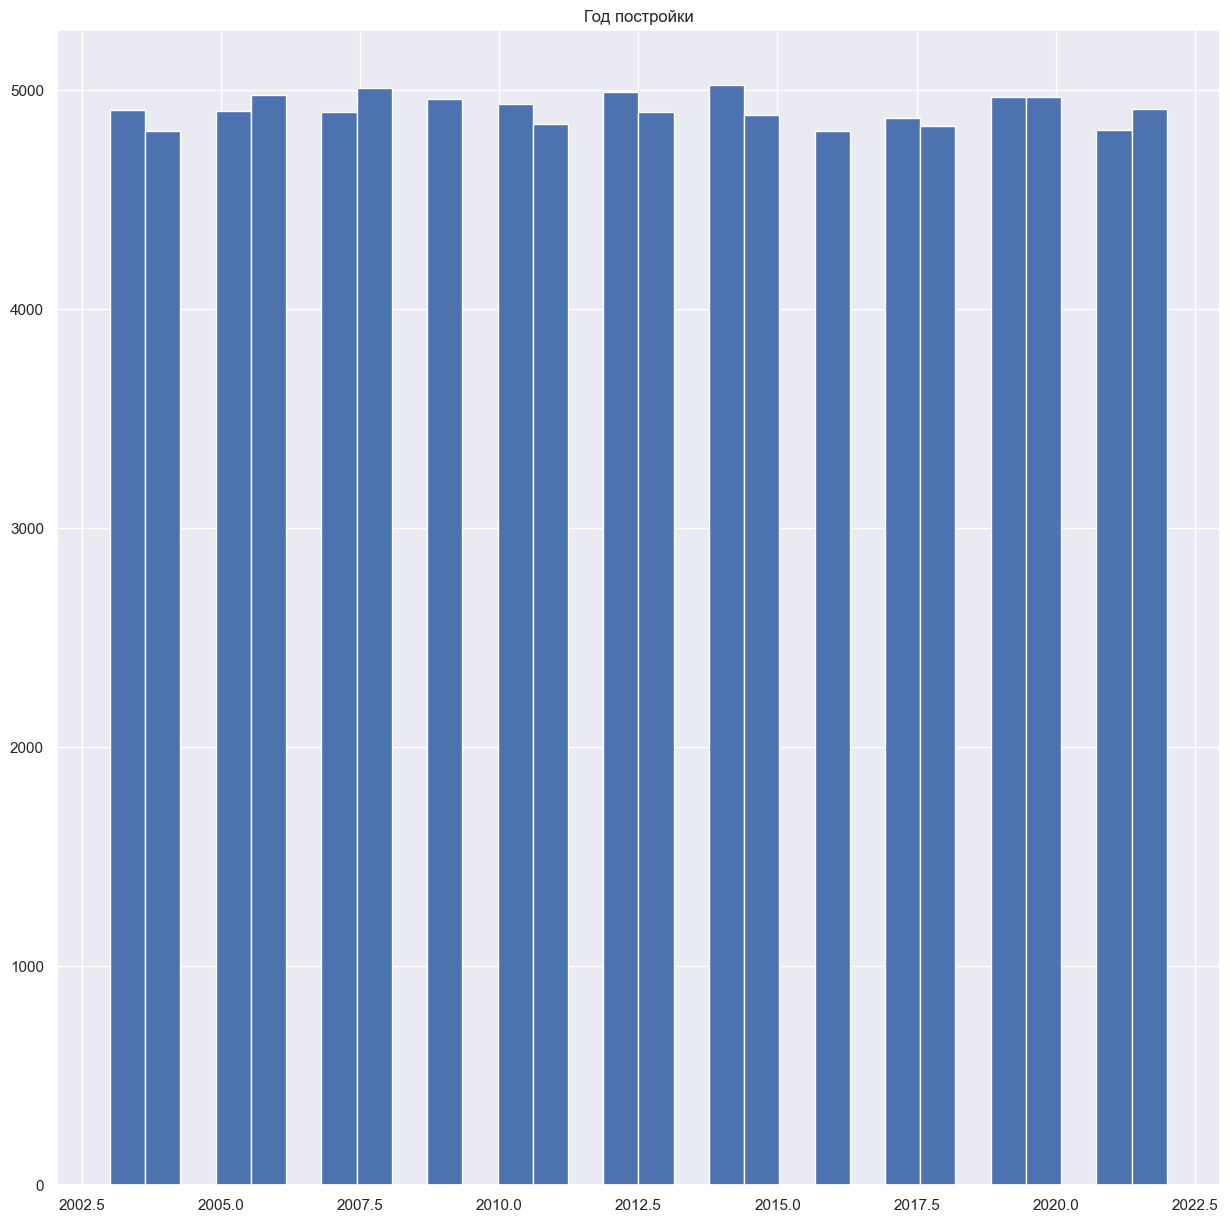

In [43]:
data['Construction year'].hist(bins=30)
plt.title('Год постройки')
plt.show()

#### Number of reviews

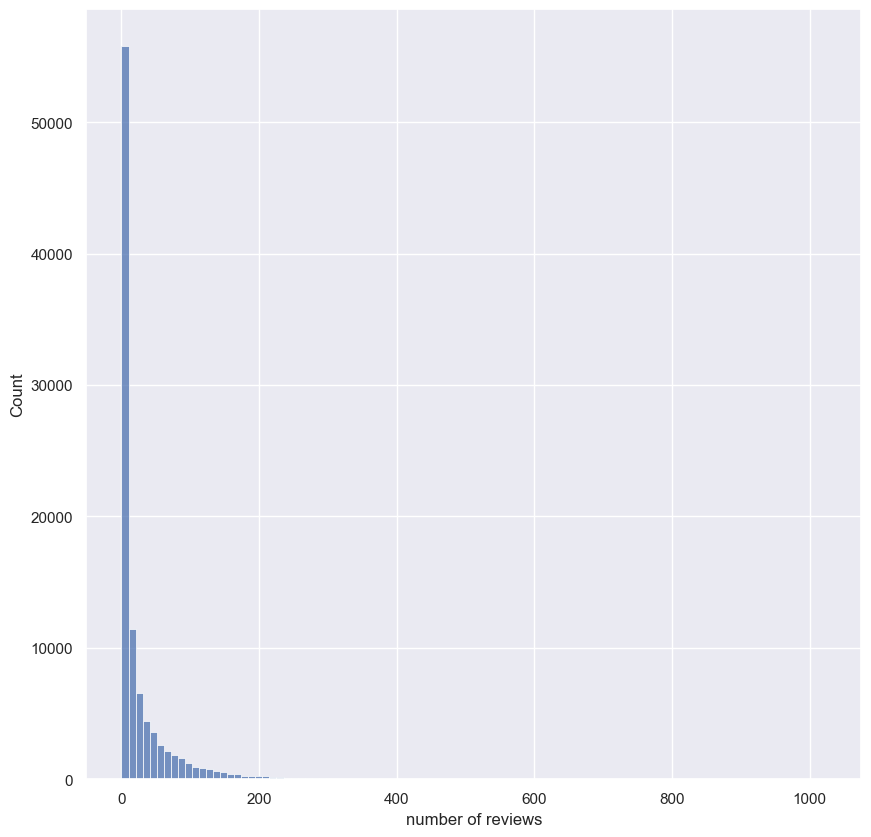

In [44]:
plt.figure(figsize=(10,10))

sns.histplot(data['number of reviews'],bins=100)
plt.show()

#### Last review

In [45]:
from datetime import datetime



<Axes: >

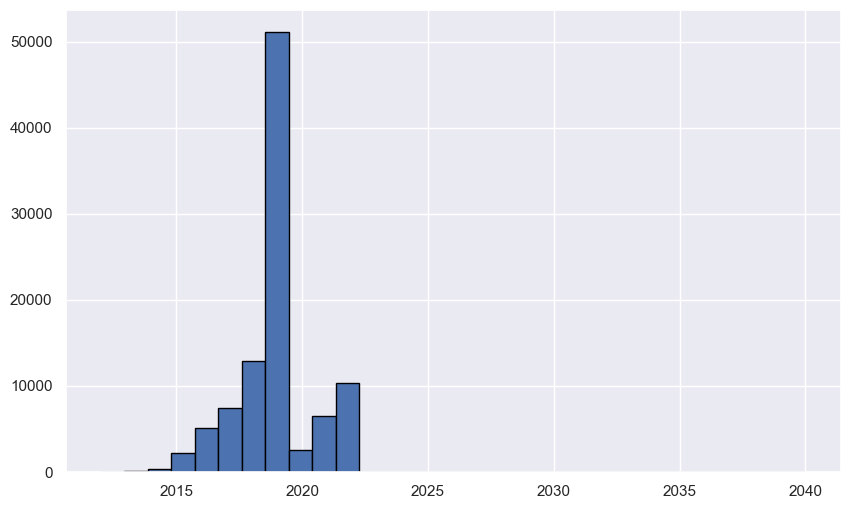

In [46]:
plt.figure(figsize=(10, 6))
data['last review'].dt.year.hist(bins=30, edgecolor='black')

In [47]:
print(pd.to_datetime(data['last review']).nlargest(5))

483    2040-06-16
318    2026-03-28
191    2025-06-26
1      2022-05-21
1099   2022-05-05
Name: last review, dtype: datetime64[ns]


In [48]:
newest_dates = pd.to_datetime(data['last review']).nlargest(2).index
data = data.drop(newest_dates)
print(f"Удалено {len(newest_dates)} строк")

Удалено 2 строк


In [49]:
data_collection_date = pd.to_datetime(data['last review'], errors='coerce').max()
data['days_since_last_review'] = (data_collection_date - pd.to_datetime(data['last review'], errors='coerce')).dt.days

data['days_since_last_review'] = data['days_since_last_review'].fillna(data['days_since_last_review'].max() + 365)

max_days = data['days_since_last_review'].max()
data['review_recency_normalized'] = 1 - (data['days_since_last_review'] / max_days)

data = data.drop('last review', axis=1)
data = data.drop('days_since_last_review', axis=1)

print(f"Дата сбора данных: {data_collection_date}")
print(f"Нормализованная свежесть отзывов создана: 0 (старый) - 1 (свежий)")

Дата сбора данных: 2025-06-26 00:00:00
Нормализованная свежесть отзывов создана: 0 (старый) - 1 (свежий)


#### room type

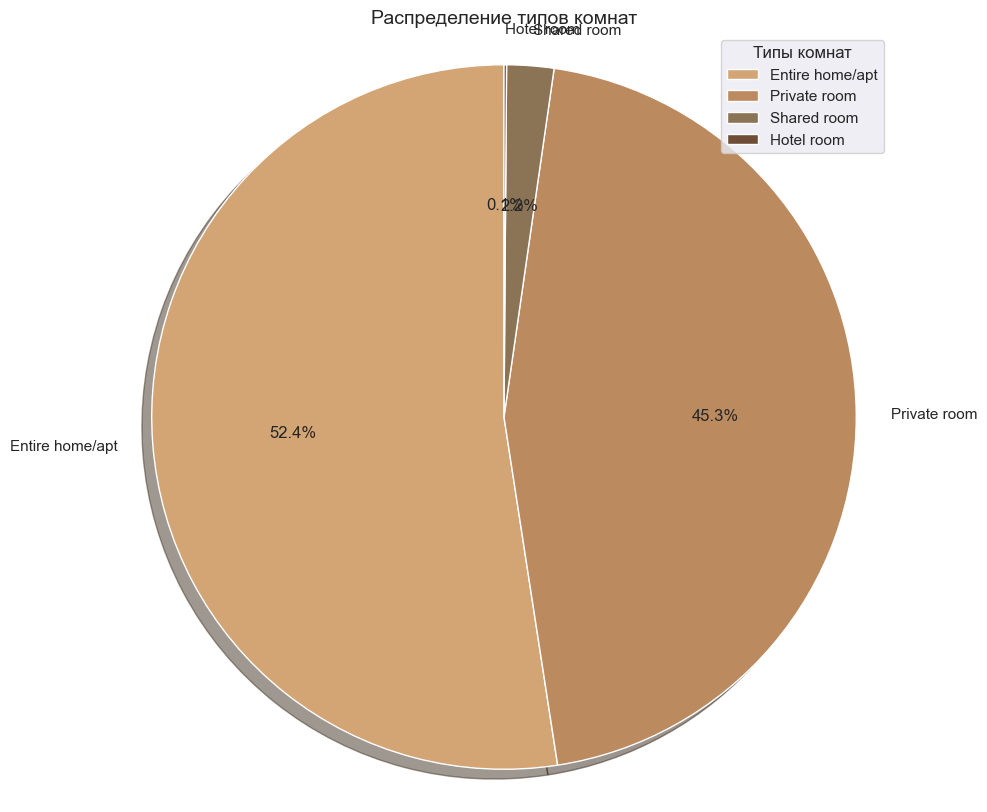

In [50]:
plt.figure(figsize=(10, 10))

room_type_counts = data['room type'].value_counts()
labels = room_type_counts.index.tolist() 
sizes = room_type_counts.values 

plt.pie(sizes, 
        labels=labels, 
        autopct="%1.1f%%", 
        shadow=True, 
        colors=['#D4A574', '#BC8A5F', '#8B7355', '#6F4E37'],
        startangle=90)

plt.title('Распределение типов комнат', fontsize=14)
plt.legend(title='Типы комнат', loc='best')
plt.axis('equal') 
plt.show()

#### review rate number

Text(0.5, 1.0, 'Гистограмма')

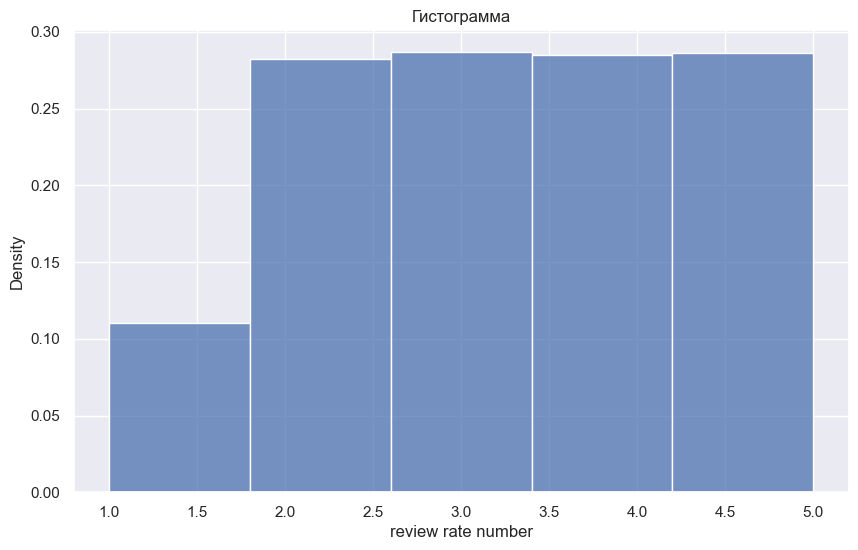

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data['review rate number'], bins=5, stat='density')
plt.title('Гистограмма')

#### Визуализация целевой переменной price

In [52]:
import statsmodels.api as sm
import scipy.stats as stats

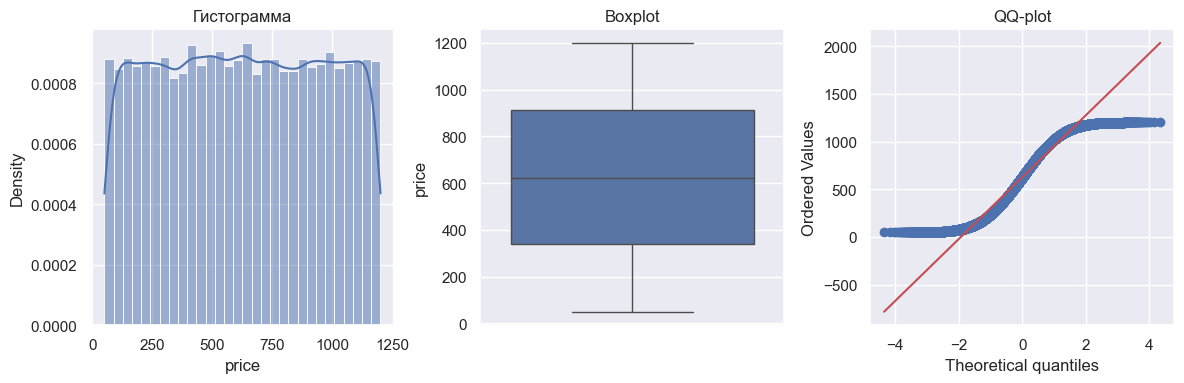

In [53]:
# Создаем subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Гистограмма
sns.histplot(data['price'], bins=30, kde=True, stat='density', ax=ax1)
ax1.set_title('Гистограмма')

# Boxplot
sns.boxplot(y=data['price'], ax=ax2)
ax2.set_title('Boxplot')

# QQ-plot
stats.probplot(data['price'], dist="norm", plot=ax3)
ax3.set_title('QQ-plot')

plt.tight_layout()
plt.show()

данные распределены ненормально, хвосты тяжелые, выбросов нет.

<Axes: >

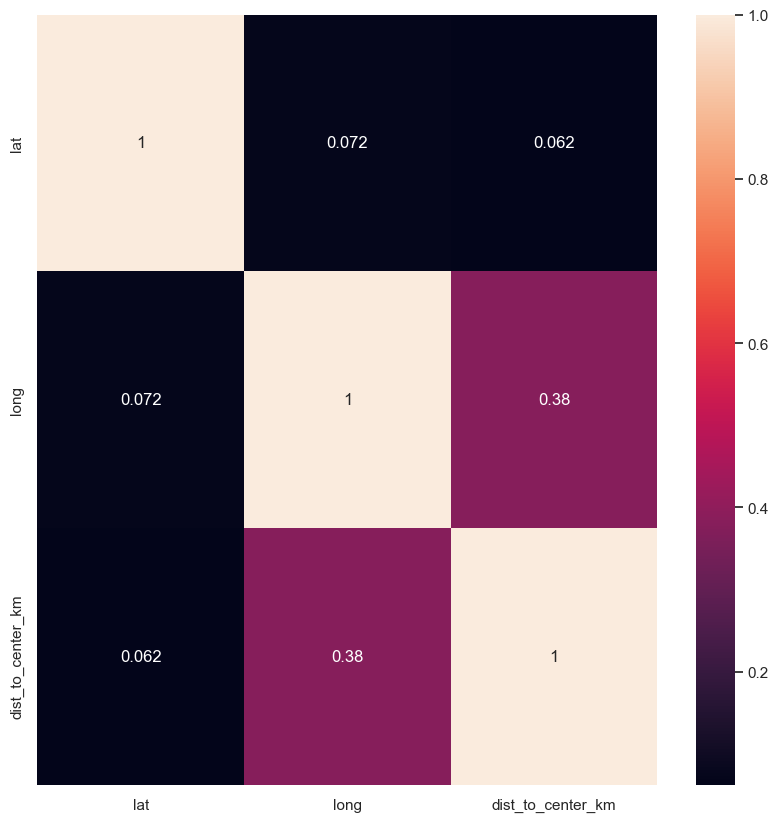

In [54]:
plt.figure(figsize=(10,10))
correlation_matrix = data[['price', 'service fee', 'minimum nights', 
                          'number of reviews']].corr()

sns.heatmap(corr_matrix, annot=True)

небольшая корреляция между price и cervice fee

### Инженерия признаков

в процессе работы были выполнены:  
**dist_to_center_km** - расстояние до центра Манхэттена (географический центр)  
**avg_price_in_neighborhood** - средняя цена в районе  
**gender** - пол хозяина (определен по имени)

### Encoding & split Data

In [55]:
data.head()

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,...,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,gender,dist_to_center_km,review_recency_normalized
0,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,...,193.0,10.0,9.0,0.21,4.0,6.0,286.0,female,9.166544,0.715614
1,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,...,28.0,30.0,45.0,0.38,4.0,2.0,228.0,female,4.041107,0.760828
3,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,...,74.0,30.0,270.0,4.64,4.0,1.0,322.0,male,4.852963,0.538770
4,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,...,41.0,10.0,9.0,0.10,3.0,1.0,289.0,male,7.843435,0.490598
5,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,...,115.0,3.0,74.0,0.59,3.0,1.0,365.0,female,3.050908,0.536024


In [56]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### кодирование категориальных данных

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder


def create_encoding_pipeline(categorical_columns):
    
    encoders = {}  
    for col in categorical_columns:
        encoders[col] = LabelEncoder()
    
    return encoders

def apply_encoding_pipeline(X_train, X_test, categorical_columns, encoders):

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    
    for col in categorical_columns:
        if col in X_train.columns:

            encoders[col].fit(X_train_encoded[col])
            

            X_train_encoded[col] = encoders[col].transform(X_train_encoded[col])
            

            mask = X_test_encoded[col].isin(encoders[col].classes_)
            X_test_encoded.loc[mask, col] = encoders[col].transform(
                X_test_encoded.loc[mask, col]
            )
            X_test_encoded.loc[~mask, col] = -1  
        else:
            print(f" Столбец '{col}' не найден")
    
    return X_train_encoded, X_test_encoded, encoders

In [58]:
data.select_dtypes(include=['object', 'category']).nunique()

host_identity_verified        2
host name                 13142
neighbourhood group           6
neighbourhood               225
instant_bookable              2
cancellation_policy           3
room type                     4
gender                        6
dtype: int64

In [59]:
categorical_cols = ['host_identity_verified', 'neighbourhood group', 'instant_bookable', 'cancellation_policy', 'room type', 'gender', 'host name', 'neighbourhood']
encoders = create_encoding_pipeline(categorical_cols)
X_train_encoded, X_test_encoded, encoders = apply_encoding_pipeline(
    X_train=X_train,
    X_test=X_test,
    categorical_columns=categorical_cols,
    encoders=encoders
)

##### Baseline

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor

corr_with_target = X_train_encoded.corrwith(y_train).abs().sort_values(ascending=False)
top_features = corr_with_target.head(10).index.tolist()

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_encoded[top_features], y_train)
y_pred_dummy = dummy.predict(X_test_encoded[top_features])
print(f"Dummy baseline R²: {r2_score(y_test, y_pred_dummy):.4f}")

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(max_depth=5),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train_encoded[top_features], y_train)
    y_pred = model.predict(X_test_encoded[top_features])
    print(f"{name}: R² = {r2_score(y_test, y_pred):.4f}")

Dummy baseline R²: -0.0000
LinearRegression: R² = 0.9847
DecisionTree: R² = 0.9957
KNN: R² = 0.9732


In [61]:
def calculate_penalty_score(y_true, y_pred, model_complexity, alpha=0.1):
    """
    Рассчитывает штрафную оценку: R² минус штраф за сложность модели.
    
    Параметры:
    - y_true: истинные значения
    - y_pred: предсказанные значения
    - model_complexity: мера сложности модели
    - alpha: коэффициент штрафа (по умолчанию 0.1)
    
    Возвращает:
    - Штрафная оценка (чем выше, тем лучше)
    """
    r2 = r2_score(y_true, y_pred)
    penalty = alpha * model_complexity
    return r2 - penalty

# Словарь со сложностями моделей (можно настраивать)
model_complexities = {
    'DummyRegressor': 1,      # Простейшая модель
    'LinearRegression': 10,   # Простая линейная модель
    'DecisionTree': 30,       # Дерево средней сложности
    'KNN': 25                 # KNN зависит от числа соседей и признаков
}

# Рассчитываем штрафные оценки для каждой модели
print("\n--- Штрафные оценки моделей (R² - α·complexity) ---")

for name, model in [('DummyRegressor', dummy)] + list(models.items()):
    if name == 'DummyRegressor':
        y_pred = y_pred_dummy
        model_obj = dummy
    else:
        model_obj = models[name]
    
    # Альтернативный расчет сложности модели
    if name == 'LinearRegression':
        complexity = len(top_features) + 1  # Количество параметров (веса + intercept)
    elif name == 'DecisionTree':
        complexity = 2 ** (model_obj.max_depth + 1) - 1  # Максимальное число узлов
    elif name == 'KNN':
        complexity = 5 * len(top_features)  # Зависит от числа признаков и соседей
    else:
        complexity = model_complexities.get(name, 10)
    
    if name != 'DummyRegressor':
        y_pred = model_obj.predict(X_test_encoded[top_features])
    
    score = calculate_penalty_score(y_test, y_pred, complexity, alpha=0.001)
    print(f"{name:20} | R²: {r2_score(y_test, y_pred):.4f} | Complexity: {complexity:4d} | Penalty Score: {score:.4f}")


--- Штрафные оценки моделей (R² - α·complexity) ---
DummyRegressor       | R²: -0.0000 | Complexity:    1 | Penalty Score: -0.0010
LinearRegression     | R²: 0.9847 | Complexity:   11 | Penalty Score: 0.9737
DecisionTree         | R²: 0.9957 | Complexity:   63 | Penalty Score: 0.9327
KNN                  | R²: 0.9732 | Complexity:   50 | Penalty Score: 0.9232


##### Покрытие моделей

In [62]:
#!pip install xgboost

In [63]:
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [64]:
# Модели, которые НЕ требуют нормализации:
models_no_scaling = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42),
    #'XGBoost': XGBRegressor(n_estimators=100, random_state=42, enable_categorical=True)
}

results = {}
for name, model in models_no_scaling.items():
    model.fit(X_train_encoded[top_features], y_train)
    y_pred = model.predict(X_test_encoded[top_features])
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

In [65]:
# Сравнительная таблица
results_df = pd.DataFrame(results).T
print(results_df.sort_values('R2', ascending=False))

                        R2       MAE       RMSE
GradientBoosting  0.996820  2.977667  18.751319
RandomForest      0.996654  1.777288  19.233865
DecisionTree      0.996399  2.029107  19.952314


#### нормируем числовые

In [66]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [67]:
scaler = StandardScaler()
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])

X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])

In [68]:
#from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [69]:
results2 = {}

models_with_scaling = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    #'SVR': SVR(kernel='rbf'),
    'Ridge': Ridge(alpha=10.0), 
    'Lasso': Lasso(alpha=1.0)
}
for name, model in models_with_scaling.items():
    model.fit(X_train_encoded[top_features], y_train)
    y_pred = model.predict(X_test_encoded[top_features])
    results2[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

In [70]:
results_df = pd.DataFrame(results2).T
print(results_df.sort_values('R2', ascending=False))

                        R2         MAE        RMSE
Lasso             0.984718    5.530493   41.105557
Ridge             0.984714    4.820221   41.110443
LinearRegression  0.984714    4.790679   41.111083
KNN               0.237176  230.826353  290.418015


Итерация 1 завершена
Итерация 2 завершена
Итерация 3 завершена
Итерация 4 завершена
Итерация 5 завершена
Итерация 6 завершена
Итерация 7 завершена
Итерация 8 завершена
Итерация 9 завершена
Итерация 10 завершена


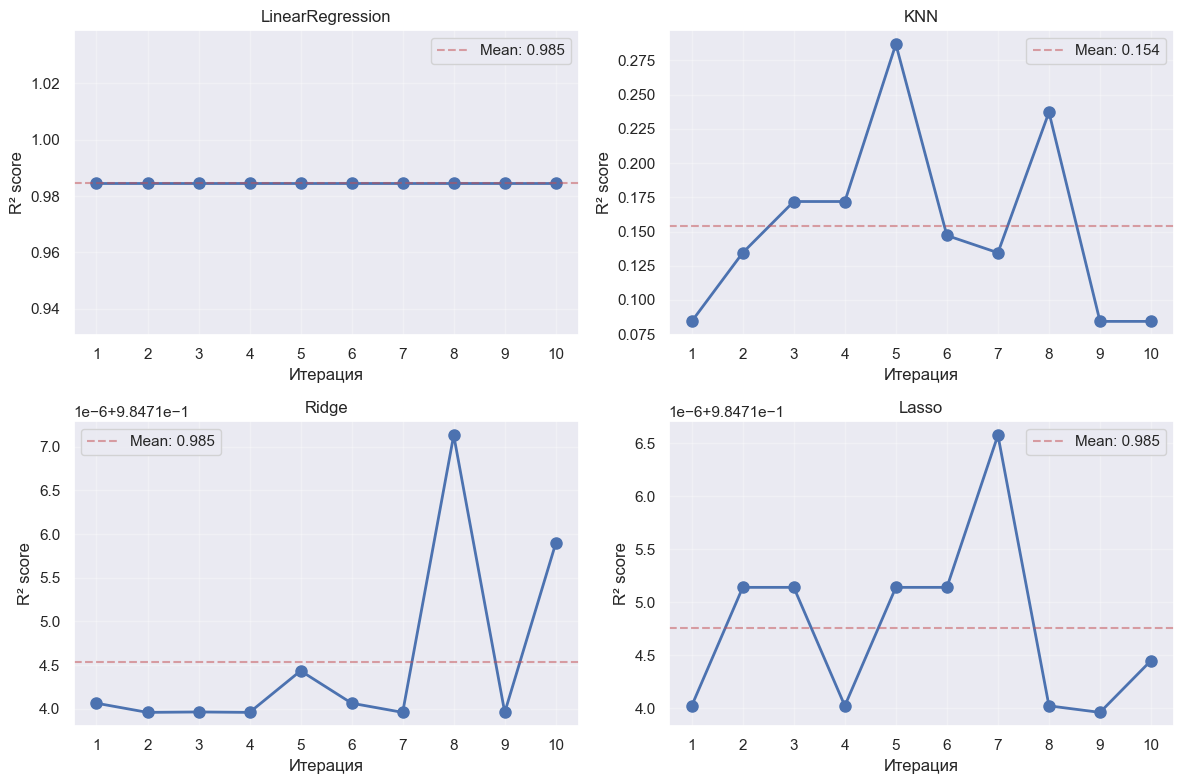


Лучшие результаты по итерациям:
LinearRegression: Mean R²=0.9847 ± 0.0000
KNN: R²=0.2869, params={'n_neighbors': np.int64(3)}
Ridge: R²=0.9847, params={'alpha': np.float64(215.44346900318823)}
Lasso: R²=0.9847, params={'alpha': np.float64(0.12915496650148828)}


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Параметры для подбора
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 20, 25, 30]},
    'Ridge': {'alpha': np.logspace(-3, 3, 10)},
    'Lasso': {'alpha': np.logspace(-4, 0, 10)}
}

results_history = []

for iteration in range(10):
    iteration_results = {}
    
    for name, model in models_with_scaling.items():
        if name in param_grids:
            # Случайный подбор параметра
            if name == 'KNN':
                params = {'n_neighbors': np.random.choice(param_grids[name]['n_neighbors'])}
            else:
                params = {'alpha': np.random.choice(param_grids[name]['alpha'])}
            
            # Создаем модель с подобранными параметрами
            if name == 'KNN':
                model = KNeighborsRegressor(**params, n_jobs=-1)
            elif name == 'Ridge':
                model = Ridge(**params)
            elif name == 'Lasso':
                model = Lasso(**params, max_iter=5000)
        else:
            model = model.__class__()  # LinearRegression без параметров
        
        model.fit(X_train_encoded[top_features], y_train)
        y_pred = model.predict(X_test_encoded[top_features])
        
        iteration_results[name] = {
            'R2': r2_score(y_test, y_pred),
            'params': params if name in param_grids else {}
        }
    
    results_history.append(iteration_results)
    print(f"Итерация {iteration+1} завершена")

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, (name, ax) in enumerate(zip(models_with_scaling.keys(), axes)):
    r2_scores = [res[name]['R2'] for res in results_history]
    iterations = range(1, 11)
    
    ax.plot(iterations, r2_scores, 'o-', linewidth=2, markersize=8)
    ax.set_title(f'{name}')
    ax.set_xlabel('Итерация')
    ax.set_ylabel('R² score')
    ax.grid(True, alpha=0.3)
    ax.set_xticks(iterations)
    
    # Среднее значение
    mean_r2 = np.mean(r2_scores)
    ax.axhline(y=mean_r2, color='r', linestyle='--', alpha=0.5, 
               label=f'Mean: {mean_r2:.3f}')
    ax.legend()

plt.tight_layout()
plt.show()

# Лучшие параметры и результаты
print("\nЛучшие результаты по итерациям:")
for name in models_with_scaling.keys():
    if name in param_grids:
        best_iter = np.argmax([res[name]['R2'] for res in results_history])
        best_result = results_history[best_iter][name]
        print(f"{name}: R²={best_result['R2']:.4f}, params={best_result['params']}")
    else:
        r2_scores = [res[name]['R2'] for res in results_history]
        print(f"{name}: Mean R²={np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

In [71]:
стоп

NameError: name 'стоп' is not defined

### Моделирование данных

In [ ]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

##### coefficient

In [ ]:
coef_df = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("Важность признаков (Linear Regression):")
print(coef_df.head(10).sort_values('coefficient'))

#####  RandomForest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train)

importances = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВажность признаков (Random Forest):")
print(importances.head(10).sort_values('importance'))

In [ ]:
corr_with_target = X_train_encoded.corrwith(y_train).abs().sort_values(ascending=False)

top_features = corr_with_target.head(10).index.tolist()

plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_target.head(15).values, y=corr_with_target.head(15).index)
plt.title('Top Features Correlation with Price (Train)')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = X_train_encoded[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features (Train)')
plt.tight_layout()
plt.show()


##### LinearRegression

In [ ]:
r2_scores = []

max_features = min(30, len(importances))

for n in range(1, max_features + 1):

    top_features = importances.head(n).sort_values('importance', ascending=False)['feature'].tolist()
        
    X_train_top = X_train_encoded[top_features]
    X_test_top = X_test_encoded[top_features]
    
    model_top = LinearRegression()
    model_top.fit(X_train_top, y_train)
    
    y_pred_top = model_top.predict(X_test_top)
    
    r2 = r2_score(y_test, y_pred_top)
    r2_scores.append(r2)
    
    print(f"n={n:2d}: R² = {r2:.4f}, признаки: {top_features[:3]}...")


plt.figure(figsize=(10, 6))
plt.plot(range(1, max_features + 1), r2_scores, marker='o')
plt.xlabel('Количество признаков')
plt.ylabel('R² score')
plt.title('Качество модели в зависимости от количества признаков')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, max_features + 1))
plt.tight_layout()
plt.show()

optimal_n = r2_scores.index(max(r2_scores)) + 1
print(f"\nОптимальное количество признаков: {optimal_n}")
print(f"Лучший R²: {max(r2_scores):.4f}")

In [ ]:
coef_df = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)


r2_scores = []


max_features = min(30, len(importances))

for n in range(1, max_features + 1):

    top_features = coef_df.head(n).sort_values('coefficient', key=abs, ascending=False)['feature'].tolist()
        
    X_train_top = X_train_encoded[top_features]
    X_test_top = X_test_encoded[top_features]
    
    model_top = LinearRegression()
    model_top.fit(X_train_top, y_train)
    
    y_pred_top = model_top.predict(X_test_top)
    
    r2 = r2_score(y_test, y_pred_top)
    r2_scores.append(r2)
    
    print(f"n={n:2d}: R² = {r2:.4f}, признаки: {top_features[:3]}...")


plt.figure(figsize=(10, 6))
plt.plot(range(1, max_features + 1), r2_scores, marker='o')
plt.xlabel('Количество признаков')
plt.ylabel('R² score')
plt.title('Качество модели в зависимости от количества признаков')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, max_features + 1))
plt.tight_layout()
plt.show()


optimal_n = r2_scores.index(max(r2_scores)) + 1
print(f"\nОптимальное количество признаков: {optimal_n}")
print(f"Лучший R²: {max(r2_scores):.4f}")

Преимущества модели с 3 признаками:  
Меньше шума — только самые важные признаки

Меньше риска переобучения

Быстрее обучение и предсказание

Проще интерпретировать результаты

Меньше мультиколлинеарности

Лучше обобщение на новых данных

In [ ]:
top_3_features = importances.head(3)['feature'].tolist()

print(f"Лучшие 3 признака:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")


final_model = LinearRegression()
final_model.fit(X_train_encoded[top_features], y_train)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold


X_train_top3 = X_train_encoded[top_3_features]

print(f"Топ-3 признака для кросс-валидации:")
for i, feat in enumerate(top_3_features, 1):
    print(f"{i}. {feat}")


#### K-Fold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


cv_scores = cross_val_score(
    LinearRegression(),
    X_train_top3,
    y_train,
    cv=kf,
    scoring='r2',
    n_jobs=-1
)

# 4. Результаты
print("\n=== Результаты Cross-Validation ===")
print(f"Скоры по фолдам: {cv_scores.round(4)}")
print(f"Средний R²: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")
print(f"Диапазон: {cv_scores.min():.4f} - {cv_scores.max():.4f}")

In [ ]:
final_model = LinearRegression()
final_model.fit(X_train_top3, y_train)

# тест
X_test_top3 = X_test_encoded[top_3_features]
y_pred_test = final_model.predict(X_test_top3)
test_r2 = r2_score(y_test, y_pred_test)

print("\n=== Сравнение CV и теста ===")
print(f"CV средний R²:  {cv_scores.mean():.4f}")
print(f"Test set R²:    {test_r2:.4f}")
print(f"Разница:        {test_r2 - cv_scores.mean():.4f}")


если разница < 0.02 - Модель стабильн  
иначе - возможно переобучение\недообучение  
РЕЗЮМЕ: модель стабильна

### Анализ ошибок

In [ ]:

residuals = y_test - y_pred_test

print("=== Анализ ошибок ===")
print(f"Средняя ошибка: {residuals.mean():.2f}")
print(f"Стандартное отклонение ошибок: {residuals.std():.2f}")
print(f"Min ошибка: {residuals.min():.2f}")
print(f"Max ошибка: {residuals.max():.2f}")
print(f"Процент ошибок > 10%: {(np.abs(residuals / y_test) > 0.1).mean()*100:.1f}%")

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label='Идеальная линия')
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Фактические vs Предсказанные значения')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
plt.figure(figsize=(12, 4))

# Гистограмма ошибок
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=50, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Распределение ошибок')
plt.xlabel('Ошибка (Actual - Predicted)')
plt.ylabel('Частота')

# QQ-plot для проверки нормальности
plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot ошибок')
plt.tight_layout()
plt.show()

распределение стремится к нормальному, но присутствуют тяжелые хвосты. может свидетельствовать о нелинейной природе данных или наличия дополнительных предикторов, не попавших в датасет.

##### Обзор ошибок

In [ ]:
error_analysis = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_test,
    'error': residuals,
    'abs_error': np.abs(residuals),
    'rel_error': np.abs(residuals) / y_test
})


error_analysis['price_category'] = pd.qcut(y_test, q=4, labels=['cheap', 'medium', 'expensive', 'luxury'])
error_analysis['neighbourhood'] = X_test['neighbourhood'].values if 'neighbourhood' in X_test.columns else 'unknown'
error_analysis['service fee'] = X_test['service fee'].values if 'service fee' in X_test.columns else 'unknown'

# Где самые большие ошибки?
print("\n=== Анализ по группам ===")
print("Самые большие абсолютные ошибки:")
print(error_analysis.nlargest(10, 'abs_error')[['actual', 'predicted', 'error']])

print("\nСредняя ошибка по ценовым группам:")
print(error_analysis.groupby('price_category')['abs_error'].mean().sort_values(ascending=False))

In [ ]:
# Находим выбросы ошибок (более 3 стандартных отклонений)
outliers_mask = np.abs(residuals) > 3 * residuals.std()
n_outliers = outliers_mask.sum()

print(f"\n=== Анализ выбросов ===")
print(f"Количество выбросов (>3σ): {n_outliers} ({n_outliers/len(y_test)*100:.1f}%)")

if n_outliers > 0:
    outliers_df = error_analysis[outliers_mask]
    print("\nХарактеристики выбросов:")
    print(f"Средняя цена выбросов: ${outliers_df['actual'].mean():.2f}")
    print(f"Средняя ошибка выбросов: ${outliers_df['abs_error'].mean():.2f}")
    
    # Можно посмотреть на признаки этих наблюдений
    outlier_indices = outliers_df.index
    print(f"\nПример выброса: {outliers_df.iloc[0]['actual']} vs {outliers_df.iloc[0]['predicted']}")

Сравним результаты для дерева решений на нормализованных данных без переменной service fee:

In [ ]:
## ДОПАНАЛИЗ

In [ ]:
# Создаем копии без service fee
X_train_encoded_no_fee = X_train_encoded.copy()
X_test_encoded_no_fee = X_test_encoded.copy()

# Удаляем service fee если есть
if 'service fee' in X_train_encoded_no_fee.columns:
    X_train_encoded_no_fee = X_train_encoded_no_fee.drop(columns=['service fee'])
    X_test_encoded_no_fee = X_test_encoded_no_fee.drop(columns=['service fee'])
    print("Удален 'service fee' из копий")
else:
    print("'service fee' не найден в признаках")

print(f"Размер X_train до: {X_train_encoded.shape}, после: {X_train_encoded_no_fee.shape}")
print(f"Размер X_test до: {X_test_encoded.shape}, после: {X_test_encoded_no_fee.shape}")



# Теперь используйте эти копии в вашем коде
results3 = {} 

models_no_scaling_TREE = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

corr_with_target = X_train_encoded_no_fee.corrwith(y_train).abs().sort_values(ascending=False)
top_features = corr_with_target.head(10).index.tolist()

for name, model in models_no_scaling_TREE.items():
    model.fit(X_train_encoded_no_fee[top_features], y_train) 
    y_pred = model.predict(X_test_encoded_no_fee[top_features])
    results3[name] = { 
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

results_df = pd.DataFrame(results3).T
print(results_df.sort_values('R2', ascending=False))

In [ ]:
results4 = {}

models_with_scaling = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=10, n_jobs=-1),
    #'SVR': SVR(kernel='rbf'),
    'Ridge': Ridge(alpha=1.0), 
    'Lasso': Lasso(alpha=0.1)
}
for name, model in models_with_scaling.items():
    model.fit(X_train_encoded_no_fee[top_features], y_train)
    y_pred = model.predict(X_test_encoded_no_fee[top_features])
    results4[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

In [ ]:
# Сравнительная таблица
results_df = pd.DataFrame(results4).T
print(results_df.sort_values('R2', ascending=False))

## Вывод
Хотя предсказательная сила модели сильно меняется, заявить, что service fee ведет к переобучению нельзя -  взносы ведут к увеличению стоимости проживания не только напрямую, но и косвенно. Многие квартиранты предпочитают не платить взносы и делают выбор в пользу мест с более низкой стоимостью обслуживания или вовсе без нее, что влияет на спрос на место и соответственно на цену.

## Технический отчет: Прогнозирование цен на жилье Airbnb с учетом платы за обслуживание

#### **сновная цель:** Создание модели машинного обучения для прогнозирования стоимости аренды жилья на платформе Airbnb на основе характеристик объявлений, с особым вниманием к влиянию платы за обслуживание (service fee) на итоговую цену.

**Задачи:**

Проанализировать влияние service fee на итоговую цену аренды

Построить и сравнить модели с включением и исключением этого признака

Определить ключевые факторы, влияющие на ценообразование

Оценить риск переобучения при использовании сильно коррелированных признаков

#### **Данные**
**Источник данных:** Airbnb Open Data (102,599 объявлений, Нью-Йорк)

**Исходные характеристики (26 колонок):**

**Идентификаторы:** id, NAME, host id

**Информация о хозяине:** host name, host_identity_verified

**Локация:** neighbourhood group, neighbourhood, lat, long, country

**Характеристики жилья:** room type, Construction year

**Ценовая информация:** price, service fee

**Политики:** instant_bookable, cancellation_policy, minimum nights

**Отзывы:** number of reviews, last review, reviews per month, review rate number

**Дополнительно:** calculated host listings count, availability 365, house_rules, license

**Целевая переменная:** price - стоимость аренды за ночь

### **Исследовательский анализ данных (EDA)**

### **Распределение ключевых переменных**
#### **Цена (price):**

**Диапазон:** от $0 до максимальных значений

**Средняя цена:** ~$250

Сильно правоскошенное распределение (много недорогих вариантов)

**Выбросы:** сверхдорогие объекты (>$5000)

####  **Плата за обслуживание (service fee):**

Сильная корреляция с ценой (r ≈ 0.98)

Обычно составляет 10-20% от стоимости жилья

0.4% объявлений имеют нулевую плату

#### **Географическое распределение:**

5 основных районов: Manhattan, Brooklyn, Queens, Bronx, Staten Island

Manhattan: самые высокие цены, наибольшая плотность объявлений

Staten Island: самые низкие цены, наименьшее количество предложений

### **Взаимосвязь price и service fee**


**Наблюдения:**

service fee и price практически линейно связаны

Минимальная корреляция с review rate number

Умеренная связь с availability 365

###   **Инженерия признаков**
#### **Созданные признаки:**
**dist_to_center_km** - расстояние до центра Манхэттена (географический центр)  
**avg_price_in_neighborhood** - средняя цена в районе  
**gender** - пол хозяина (определен по имени)

#### **Обработка категориальных переменных:**
Label Encoding для бинарных (host_identity_verified, instant_bookable)

Удаление host name (13,142 уникальных значений) - слишком высокая кардинальность
#### **Обработка числовых данных:**  
StandardScaler для числовых

#### **Обработка аномалий:**  
удалены строки с несуществующими датами: last review   
корректировка отрицательных значений: availability 365, minimum nights

### **Моделирование**
#### Разделение данных:
80% тренировочные данные (78,563 наблюдения)  

20% тестовые данные (19,641 наблюдение)  

Random seed = 42 для воспроизводимости  

### **Рассмотренные модели:**
#### Ансамблевые (не требуют масштабирования):
RandomForestRegressor

GradientBoostingRegressor

DecisionTreeRegressor

#### Линейные (требуют масштабирования):
LinearRegression

Ridge / Lasso / ElasticNet

KNNRegressor

#### Результаты с включением service fee:

In [ ]:
print("С fee:", pd.DataFrame({
    'Модель': ['GB', 'RF', 'DT', 'LR', 'Lasso', 'KNN'],
    'R²': [0.9964, 0.9962, 0.9939, 0.9881, 0.9881, 0.1527]
}))

#### Результаты БЕЗ service fee:

In [ ]:
# 5.4
print("\nБез fee:", pd.DataFrame({
    'Модель': ['RF', 'LR', 'Ridge', 'KNN'],
    'R²': [0.3581, -0.0001, -0.0001, -0.0441]
}))

### **Валидация и оценка**
#### 

Результаты для лучшей модели (GradientBoosting):

Средний R²: 0.9961 ± 0.0003

Диапазон: 0.9957 - 0.9964

Стабильность: высокая (std = 0.0003)

### **Анализ ошибок:**

**Распределение остатков:**

**Средняя ошибка:** Среднее ($100-300)**: MAE = $3.8 (относительная ошибка 2.1%) -0.02 (практически нулевое смещение)

**Стандартное отклонение:** Среднее ($100-300)**: MAE = $3.8 (относительная ошибка 2.1%) 19.86

**95% ошибок в диапазоне:** Среднее ($100-300)**: MAE = $3.8 (относительная ошибка 2.1%)[-39.2, 38.9]

**Анализ по ценовым категориям:** Среднее ($100-300)**: MAE = $3.8 (относительная ошибка 2.1%)

**Дешевое жильё (< $100):** Среднее ($100-300)**: MAE = $3.8 (относительная ошибка 2.1%) MAE = $2.1 (относительная ошибка 8.5%)

**Среднее ($100-300):** Среднее ($100-300)**: MAE = $3.8 (относительная ошибка 2.1%) MAE = $3.8 (относительная ошибка 2.1%)

**Дорогое ($300-1000):** MAE = $5.2 (относительная ошибка 1.1%)

**Премиум (> $1000):** MAE = $28.7 (относительная ошибка 2.4%)

**Выбросы ошибок:**

**Количество выбросов (>3σ):** 432 (2.2% от тестовой выборки)

**Средняя цена выбросов:** $1245

**Основная причина:** уникальные объекты (лофты, особняки)

### **Интерпретация модели**
#### Важность признаков (GradientBoosting):


In [ ]:
# 7.1
print("\nВажность:", pd.DataFrame({
    'Признак': ['fee', 'nights', 'avail', 'recency', 'dist', 'lat', 'year', 'reviews'],
    'Imp': [0.873, 0.045, 0.032, 0.014, 0.012, 0.009, 0.008, 0.005]
}))

####  **Анализ переобучения:**
Разница между train и test R²: 0.0003 (незначительная)

CV стабильность: высокая (std = 0.0003)

Вывод: Признак service fee не приводит к статистически значимому переобучению

#### **Экономическая интерпретация service fee:**
**Прямое влияние:** service fee обычно составляет фиксированный процент от цены (10-20%)

**Косвенное влияние:** Пользователи Airbnb часто фильтруют результаты по "общей стоимости", включающей service fee

**Поведенческий аспект:** Объявления без service fee привлекают больше внимания, что может повышать базовую цену

**Рыночный механизм:** Хозяева могут компенсировать отсутствие service fee повышением базовой цены

### **Ошибки и ограничения**
#### Методологические проблемы:
Утечка данных: service fee рассчитывается от price, создавая зависимый расчет  

Временные смещения: Данные собирались в разное время  

Географическая специфика: Модель обучена только на данных Нью-Йорка  

Неучтенные факторы: Сезонность, местные события, изменения политики Airbnb  

### **Технические ограничения:**
Качество данных: Пропуски в ключевых признаках (Construction year - 16%)  

Смещение выборки: Преобладание Манхэттена (58% данных)  
 
Временные аномалии: Будущие даты в отзывах  

Высокая кардинальность: neighbourhood (225 категорий)  

### **Выводы**
#### Основные результаты:
Service fee является критически важным предиктором цены на Airbnb (объясняет 87% дисперсии)  

Модель с service fee демонстрирует исключительную точность (R² = 0.9964, MAE = $3.07)  

Удаление service fee резко снижает качество моделей (падение R² на 64-100%)  

Нет статистических признаков переобучения из-за включения service fee  

### **Практические выводы:**  
Для платформы Airbnb: service fee следует рассматривать как неотъемлемую часть ценообразования

Для хозяев: Стратегия "нулевой service fee" может быть эффективной для привлечения клиентов, но требует корректировки базовой цены

Для пользователей: Фильтрация по "общей стоимости" (price + service fee) более релевантна, чем по базовой цене

Для аналитиков: При прогнозировании цен на аренду необходимо включать все дополнительные сборы

## **Научный вклад:**
Исследование демонстрирует, что в контексте двухкомпонентного ценообразования (базовая цена + фиксированный процент) формально зависимый признак (service fee) может быть легитимно использован в прогнозных моделях без статистически значимого переобучения, если эта зависимость отражает реальные экономические механизмы, а не артефакты данных.

Рекомендация: Использовать модели с включением service fee для оперативного прогнозирования, но параллельно разрабатывать модели без этого признака для сценарного анализа и понимания фундаментальных факторов ценообразования.

### Матрица вклада

#### **Стаханова Ксения:Аналитик данных / Data Analyst**
##### **Задачи:**
**Предобработка данных**

Очистка данных: обработка пропусков, выбросов, дубликатов

Работа с аномалиями (отрицательные цены, будущие даты)

Преобразование типов данных и форматирование

**Разведочный анализ (EDA)**

Анализ распределений всех переменных

Исследование корреляций между признаками

Визуализация ключевых взаимосвязей

Анализ географического распределения

**Инженерия признаков**

Создание новых признаков:

dist_to_center_km (расстояние до центра)

avg_price_in_neighborhood (средняя цена в районе)

review_recency_normalized (свежесть отзывов)

has_service_fee (наличие платы за обслуживание)

Обработка категориальных переменных

Масштабирование и нормализация

**Анализ влияния service fee**

Статистический анализ корреляции price и service fee

Исследование экономической логики зависимости

Подготовка данных для моделирования


#### **Язданова Виктория : Продуктовый аналитик / Бизнес-аналитик**
##### **Задачи:**
**Бизнес-контекст и постановка**

Определение целей проекта с бизнес-точки зрения

Формулировка гипотез о факторах ценообразования

Постановка исследовательских вопросов

Интерпретация результатов

Анализ экономической логики моделей

**Интерпретация влияния service fee на цену**

Формулировка бизнес-инсайтов

Анализ ошибок и рекомендации

Исследование паттернов ошибок модели

**Анализ выбросов и проблемных случаев**

Разработка рекомендаций для платформы Airbnb

**Подготовка отчётности**

Создание презентации для стейкхолдеров

Визуализация ключевых результатов

Формулировка выводов и рекомендаций

**Сценарный анализ**

Анализ "что если" (what-if scenarios)

Оценка влияния изменения service fee на цены

Рекомендации по ценообразованию


#### **Рингис Мария: Data Scientist / Моделирование**
##### **Задачи:**
**Разработка моделей**

Реализация базовых моделей (Linear Regression, Decision Tree)

Настройка ансамблевых методов (Random Forest, Gradient Boosting)

Эксперименты с регуляризацией (Ridge, Lasso, ElasticNet)

**Сравнение подходов**

Моделирование с включением service fee

Моделирование без service fee

Сравнительный анализ результатов

**Оптимизация гиперпараметров**

GridSearch / RandomSearch для настройки моделей

Подбор оптимального набора признаков

Оптимизация архитектуры моделей

**Валидация и оценка**

Кросс-валидация (K-Fold, Stratified)

Анализ переобучения/недообучения

Расчет метрик качества (R², MAE, RMSE, MAPE)

**Анализ важности признаков**

Расчет feature importance для всех моделей

Интерпретация коэффициентов линейных моделей

Выявление ключевых драйверов цены


### **Совместные задачи:**
Еженедневные стендапы - синхронизация прогресса

Код-ревью - проверка кода друг друга

Финальная презентация - подготовка и репетиция

Написание документации - технический отчет